## This scripts are used to test the computing clustering pipeline

In [24]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column

from pypower import CatalogFFTPower, PowerSpectrumMultipoles, setup_logging
from pycorr import project_to_multipoles, project_to_wp, TwoPointCorrelationFunction, setup_logging
from pypower import CatalogFFTPower, PowerSpectrumMultipoles, setup_logging
setup_logging()

sys.path.append('/global/homes/s/shengyu/desi_y3_redshift_errors/main/')
from helper import REDSHIFT_OVERALL, REDSHIFT_ABACUSHF_v1
from helper import GET_REPEATS_DV, GET_CTHR, GET_REPEATS_NUMBER

ABACUSHF_DIR = f'/global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0'
LOCAL_DIR = '/pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1'
REPEAT_DIR = '/pscratch/sd/s/shengyu/repeats/DA2/loa-v1'

def zfmt(x):
    return f"{x:.3f}".replace(".", "p")

BOXSIZE = 2000

[000281.16]  11-20 07:52  TwoPointEstimator            INFO     Loading /pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1/Boxes/QSO/z1.400/AbacusSummit_base_c000_ph000/mpspk/xipoles_QSO_zp1.400_DR2_v1.0.npy.


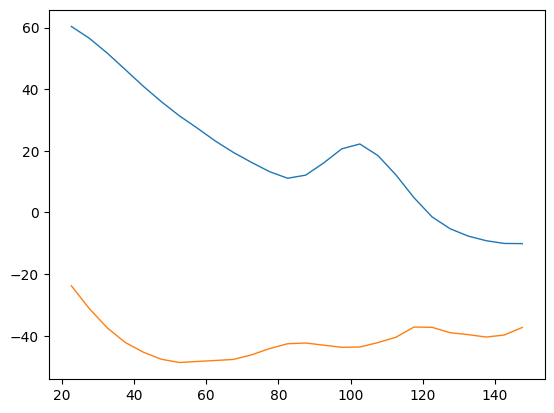

In [23]:
base_dir = '/pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1/Boxes/QSO/z1.400/AbacusSummit_base_c000_ph000/mpspk'

# fn = base_dir+'/xipoles_QSO_zp1.400_DR2_v1.0_dv_zobs0.8-2.1.npy'
fn = base_dir+'/xipoles_QSO_zp1.400_DR2_v1.0.npy'

result = TwoPointCorrelationFunction.load(fn)
result = result[::rbin,::]
result.select((rmin, rmax))
r, xi = project_to_multipoles(result, ells=[0,2])
plt.plot(r, r**2*xi[0], lw = 1)
plt.plot(r, r**2*xi[1], lw = 1)

[000179.44]  11-20 07:50  PowerSpectrumMultipoles      INFO     Loading /pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1/Boxes/QSO/z1.400/AbacusSummit_base_c000_ph000/mpspk/pkpoles_QSO_zp1.400_DR2_v1.0_dv_zobs0.8-2.1.npy.


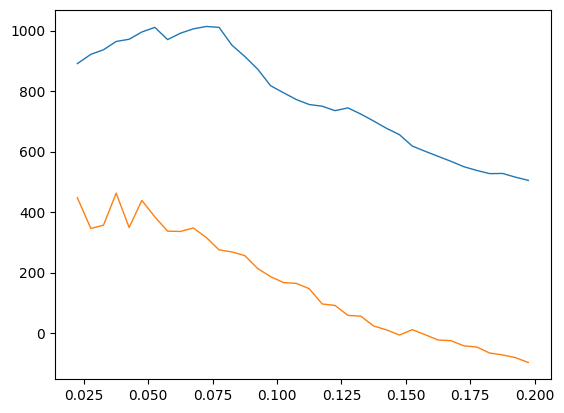

In [ ]:
base_dir = '/pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1/Boxes/QSO/z1.400/AbacusSummit_base_c000_ph000/mpspk'
fn = base_dir+'/pkpoles_QSO_zp1.400_DR2_v1.0_dv_zobs0.8-2.1.npy'

result = PowerSpectrumMultipoles.load(fn)
result = result.select((kmin,kmax,kbin))
pk = np.real(result.get_power())
k = result.kavg
plt.plot(k, k*pk[0], lw = 1)
plt.plot(k, k*pk[1], lw = 1)

In [ ]:
tracer = 'QSO'
z= REDSHIFT_ABACUSHF_v1[tracer][0]

mock_id = '000'

# data_fn = ABACUSHF_DIR+ '/AbacusSummit_base_c000_ph000/Boxes/LRG/abacus_HF_LRG_0p500_DR2_v1.0_AbacusSummit_base_c000_ph000_clustering.dat.fits'
cubic_name = f'/abacus_HF_{tracer}_{zfmt(z)}_DR2_v1.0_AbacusSummit_base_c000_ph{mock_id}_clustering.dat.fits'
data_fn = LOCAL_DIR+ f'/Boxes/{tracer}/z{z:.3f}/AbacusSummit_base_c000_ph{mock_id}'+cubic_name
data = Table.read(data_fn)
print(data_fn)
data


/pscratch/sd/s/shengyu/galaxies/catalogs/Y3/AbacusHF-v1/Boxes/QSO/z1.400/AbacusSummit_base_c000_ph000/abacus_HF_QSO_1p400_DR2_v1.0_AbacusSummit_base_c000_ph000_clustering.dat.fits


X,Y,Z,VX,VY,VZ,HALO_MASS,HALO_ID,IS_CENTRAL,X_RSD,Y_RSD,Z_RSD,VZ_OBS,Z_OBS
float64,float64,float64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64
-999.5970458984375,-999.1553955078125,-834.3856201171875,-421.20736123501945,-151.8582328793694,337.8748883209528,1273885238353.6501,140000000,True,995.9021064420577,999.2219102210628,1169.2247712013448,231758.9261385761,1642.0944139013181
-998.8013916015625,-998.6041259765625,-834.808349609375,-441.05190555685476,-375.49933864289034,585.142952010269,1465811656714.879,140003000,True,996.4857101456026,997.3834433894594,1171.4442459727843,620.2227773368038,1171.8190944779335
-998.616455078125,-999.9208984375,-689.7199096679688,-116.13937729649764,-247.47624270181979,239.98268761375948,1699919705485.1687,263003000,True,1000.1425275689289,997.4346727840438,1312.844446079996,269.3537252146965,1313.158292840546
-998.85205078125,-998.8953247070312,-665.1028442382812,12.736542377953088,-92.2626977045932,631.7525702080413,1318175950283.1643,284002000,True,1001.2840466430304,1000.1187942632409,1341.6478024471655,737.7637440991325,1342.780594007337
-998.6487426757812,-999.6947631835938,-660.3684692382812,-14.933937605194448,370.41967322642085,582.92319663839,2653224552729.953,288000000,True,1001.1916794433373,1004.2633882465884,1345.8604069560192,667.7465072998358,1346.7667937725805
-998.841064453125,-998.7299194335938,-561.7134399414062,-0.5494679046537169,-146.1615723634378,-44.751503900684476,1280212482915.0093,372002000,True,1001.1530641600945,999.7082584535337,1437.8083639962074,-398.3680233403156,1434.029764117954
-998.7830200195312,-999.8143310546875,-537.18310546875,-60.21917990250893,307.52864466255915,117.2751166914664,2583624862555.002,393000000,True,1000.5735027294378,1003.4717928546899,1464.0700479256525,144.13824767620704,1464.3570962333201
-998.81494140625,-999.737548828125,-534.1982421875,96.45441743815762,404.99614750746986,190.57314799945215,8860251467423.318,395000000,True,1002.2157306069421,1004.5900725061099,1467.8381436549098,70286.89062411414,216.8584018175843
-999.235595703125,-999.7916870117188,-404.0475769042969,-115.67753162508858,33.638774306634154,43.04733425012666,1577592977298.891,506000000,True,999.5283220357638,1000.5677630182206,1596.412409106013,-937.4142348161434,1585.9356022775967


In [ ]:


rmin, rmax, rbin, lenr = 20, 150, 5, 36
smuedges  = (np.linspace(0., 200, 201), np.linspace(-1., 1., 201)); ells = (0, 2, 4)

[000000.00]  11-20 05:16  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
[000000.00]  11-20 05:16  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000000.00]  11-20 05:16  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000000.35]  11-20 05:16  numexpr.utils                INFO     Note: detected 256 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[000000.35]  11-20 05:16  numexpr.utils                INFO     Note: NumExpr detected 256 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
[000000.35]  11-20 05:16  numexpr.utils                INFO     NumExpr defaulting to 16 threads.


/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/pycorr/corrfunc.py:148: UserWarning: These arguments are not read: {'ells': (0, 2, 4)}
  warnings.warn('These arguments are not read: {}'.format(attrs))


[000360.27]  11-20 05:22  TwoPointCorrelationFunction  INFO     Analytically computing two-point counts R1R2.
[000360.28]  11-20 05:22  TwoPointCorrelationFunction  INFO     Correlation function computed in elapsed time 360.28 s.


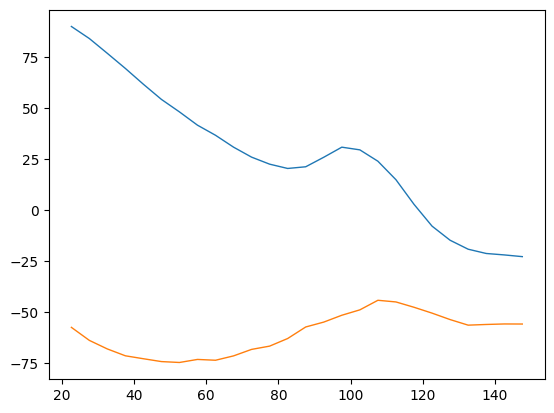

In [8]:
positions = np.array([data['X'], data['Y'], data['Z_RSD']])
result = TwoPointCorrelationFunction('smu', smuedges, data_positions1=positions, 
                                        engine='corrfunc', ells=ells, boxsize=BOXSIZE, 
                                        los='z', position_type='xyz',
                                        gpu=False, nthreads = 4)
result = result[::rbin,::]
result.select((rmin, rmax))
r, xi = project_to_multipoles(result, ells=[0,2])
plt.plot(r, r**2*xi[0], lw = 1)
plt.plot(r, r**2*xi[1], lw = 1)

[000360.91]  11-20 05:22  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
[000360.91]  11-20 05:22  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000360.91]  11-20 05:22  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.


/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/pycorr/corrfunc.py:148: UserWarning: These arguments are not read: {'ells': (0, 2, 4)}
  warnings.warn('These arguments are not read: {}'.format(attrs))


[000726.49]  11-20 05:28  TwoPointCorrelationFunction  INFO     Analytically computing two-point counts R1R2.
[000726.49]  11-20 05:28  TwoPointCorrelationFunction  INFO     Correlation function computed in elapsed time 365.58 s.


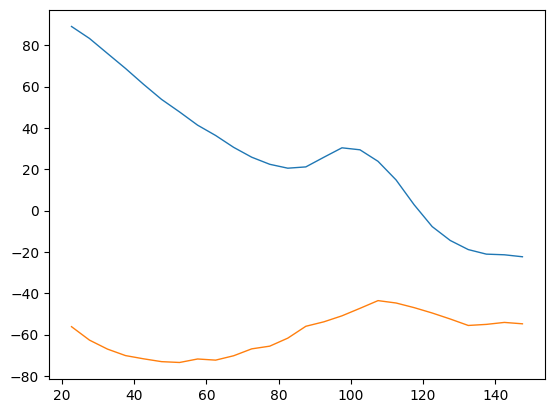

In [9]:
positions = np.array([data['X'], data['Y'], data['Z_OBS']])
result = TwoPointCorrelationFunction('smu', smuedges, data_positions1=positions, 
                                        engine='corrfunc', ells=ells, boxsize=BOXSIZE, 
                                        los='z', position_type='xyz',
                                        gpu=False, nthreads = 4)
result = result[::rbin,::]
result.select((rmin, rmax))
r, xi = project_to_multipoles(result, ells=[0,2])
plt.plot(r, r**2*xi[0], lw = 1)
plt.plot(r, r**2*xi[1], lw = 1)

In [ ]:
kedges   = np.arange(0.,0.4001,0.001); ells = (0, 2, 4)
kmin, kmax, kbin, lenk = 0.02, 0.2, 0.005, 36
result = CatalogFFTPower(data_positions1=positions,
                        edges=kedges, ells=ells, interlacing=3, 
                        boxsize=BOXSIZE, nmesh=512, resampler='tsc',los='z', position_type='xyz')
result = PowerSpectrumMultipoles.load(result)
result = result.select((kmin,kmax,kbin))
pk = np.real(result.get_power())
k = result.kavg
plt.plot(k, k*pk[0], lw = 1)
plt.plot(k, k*pk[1], lw = 1)

[007229.97]  11-20 07:17  CatalogFFTPower              INFO     Painting catalog 1 to mesh CatalogMesh(nmesh=[512 512 512], boxsize=[2000. 2000. 2000.], boxcenter=[1.22070312e-04 3.05175781e-05 9.99999770e+02], dtype=float64).
[007230.53]  11-20 07:17  CatalogMesh                  INFO     Slab 0 ~ 4194304 / 7184949.
[007232.19]  11-20 07:17  CatalogMesh                  INFO     Painted 4194304 out of 7184949 objects to mesh.
[007232.20]  11-20 07:17  CatalogMesh                  INFO     Slab 4194304 ~ 8388608 / 7184949.
[007233.45]  11-20 07:17  CatalogMesh                  INFO     Painted 7184949 out of 7184949 objects to mesh.
[007233.46]  11-20 07:17  CatalogMesh                  INFO     Running interlacing at order 3.


KeyboardInterrupt: 

In [11]:
result